# Non Linear Regression Analysis

## Importing requierd libraries

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Ploting the dataset

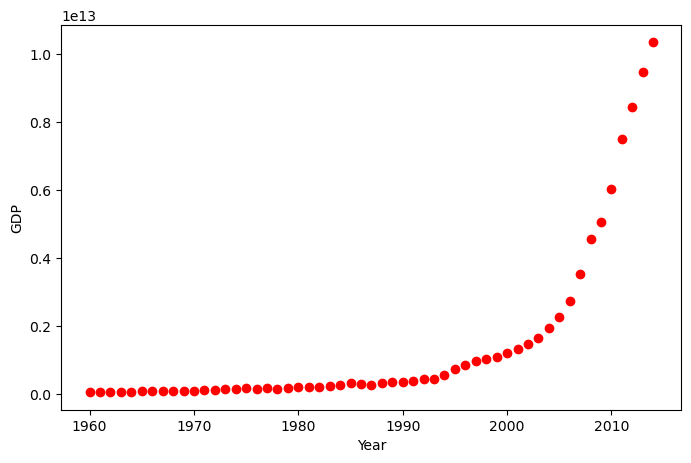

In [62]:
plt.figure(figsize=(8,5))
x_data = (df["Year"].values)
y_data = (df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Choosing a model

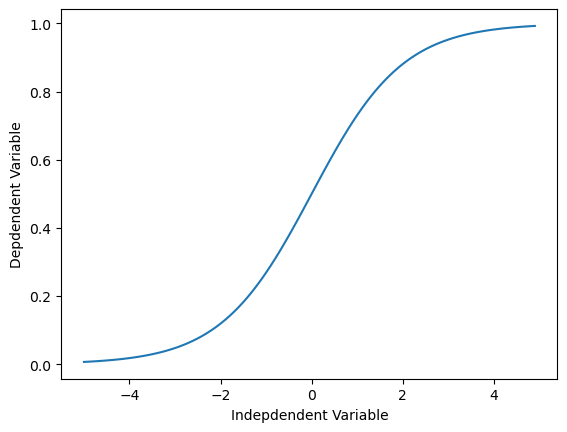

In [63]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.xlabel("Indepdendent Variable")
plt.ylabel("Depdendent Variable")
plt.show()

## Building The Model

In [64]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

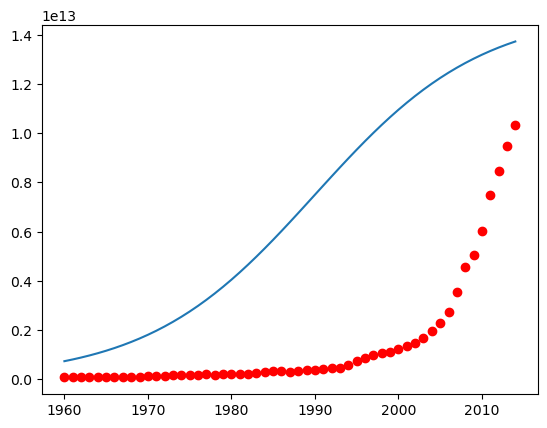

In [65]:
beta_1 = 0.1
beta_2 = 1990.0

y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

###### Let's first normalize our x and y:

In [66]:
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

In [67]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


###### Now we plot our resulting regression model

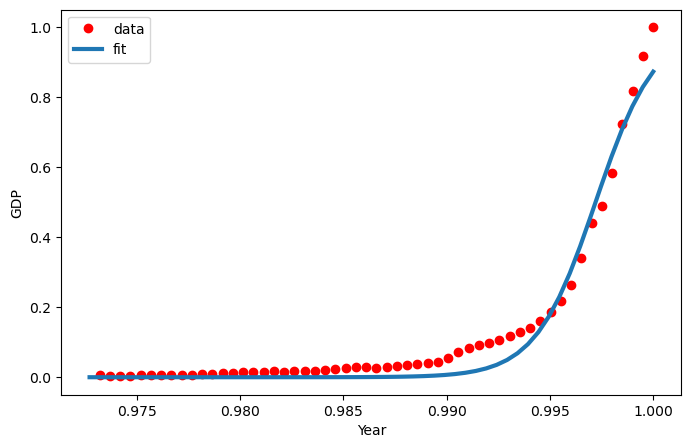

In [68]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## The Accuracy of the model

In [69]:
msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]
train_y = ydata[msk]

test_x = xdata[~msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.90
